<a href="https://colab.research.google.com/github/teacher-jiejie/Data_Analysis-/blob/master/2021_%EC%A0%84_%EC%84%B8%EA%B3%84_%EC%83%81%EC%96%B4_%EA%B3%B5%EA%B2%A9_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 나눔끌꼴 설치

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,584 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

# 1. 프로젝트 목표 수립
<br/>
1) 주제 및 데이터 선정
<br/>
주제 : 전 세계 상어 공격 분석
<br/>
데이터 굵은 텍스트: Global Shark Attacks [출처 - https://www.kaggle.com/teajay/global-shark-attacks?select=attacks.csv](https://www.kaggle.com/teajay/global-shark-attacks?select=attacks.csv)
<br/>
<br/>
2) 프로젝트 목표 수립
<br/>
최상위 목표 : 상어 공격 양상을 파악하여 상어로부터 위험을 예방하기
<br/>
하위 목표 : 언제 어디에서 공격 받았는지, 무자극/자극에서 어떤 경우가 가장 많은 공격을 받았는지, 어떤행동이 가장 많은 공격을 받았는지, 각 경우에서 성별이 어떻게 작용하였는지, 무슨 연령이 가장 많이 공격 받았는지, 공격에서 치명적 부상을 입었는지

- CSV 파일 업로드

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving GlobalSharkattacks_v2.csv to GlobalSharkattacks_v2 (1).csv


In [ ]:
import csv 
 
f = open('GlobalSharkattacks_v2.csv',encoding='cp949')        
data = csv.reader(f)         
next(data)                   
data = list(data)            

In [ ]:
print(data[0])

['2016.09.18.c', '18-Sep-16', '2016', 'Unprovoked', 'USA', 'Florida', 'New Smyrna Beach, Volusia County', 'Surfing', 'male', 'M', '16', 'Minor injury to thigh', 'N', '13h00', '', 'Orlando Sentinel, 9/19/2016', '2016.09.18.c-NSB.pdf', 'http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.18.c-NSB.pdf', 'http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.18.c-NSB.pdf', '2016.09.18.c', '2016.09.18.c', '5993', '', '', '', '', '', '', '', '', '', '', '', '']


In [ ]:
len(data)

5991

- 하위 목표 : 지역별 상어 사고 발생 횟수 그래프 그리기

In [ ]:
c_Western_Cape_Province = 0
c_Florida = 0
c_Victoria = 0
c_Western_Australia = 0
c_South_Carolina = 0
c_South_Australia = 0
c_Queensland = 0
c_North_Island = 0
c_North_Carolina = 0
c_New_South_Wales = 0
c_KwaZulu_Natal = 0
c_Hawaii = 0
c_Eastern_Cape_Province = 0
c_others = 0

for row in data:
    if row[5] == 'Western Cape Province':
        c_Western_Cape_Province += 1
    elif row[5] == 'Florida':
        c_Florida += 1
    elif row[5] == 'Victoria':
        c_Victoria += 1
    elif row[5] == 'Western Australia':
        c_Western_Australia += 1
    elif row[5] == 'South Carolina':
        c_South_Carolina += 1
    elif row[5] == 'South Australia':
        c_South_Australia += 1
    elif row[5] == 'Queensland':
        c_Queensland += 1
    elif row[5] == 'North Island':
        c_North_Island += 1
    elif row[5] == 'North Carolina':
        c_North_Carolina += 1
    elif row[5] == 'New South Wales':
        c_New_South_Wales += 1
    elif row[5] == 'KwaZulu-Natal':
        c_KwaZulu_Natal += 1
    elif row[5] == 'Hawaii':
        c_Hawaii += 1
    elif row[5] == 'Eastern Cape Province':
        c_Eastern_Cape_Province += 1
    else:
        c_others += 1

Area = [c_Western_Cape_Province,c_Florida,c_Victoria,c_Western_Australia,c_South_Carolina,c_South_Australia,c_Queensland,c_North_Island,c_North_Carolina,c_New_South_Wales,c_KwaZulu_Natal,c_Hawaii,c_Eastern_Cape_Province,c_others]
Areaname = ['WCP','F','V','WA','SC','SA','Q','NI','NC','NSW','KN','H','ECP','etc']


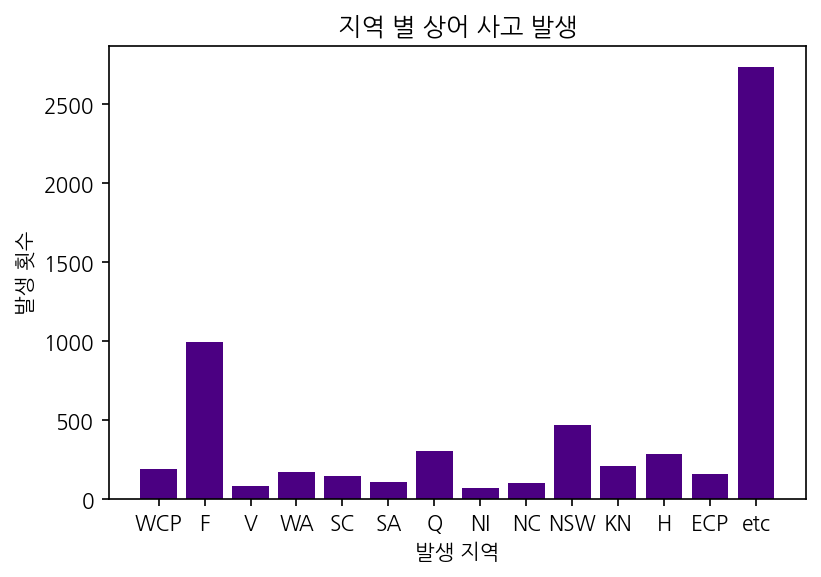

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi = 150)
plt.rc('font', family='NanumGothic')
plt.title('지역 별 상어 사고 발생') 
plt.bar(Areaname, Area, color='indigo')
plt.xlabel('발생 지역') # x축 이름
plt.ylabel('발생 횟수') # y축 이름

plt.show()

결과 분석 - 상어 사고는 주로 플로리다,뉴 사우스 웨일스,퀸스랜드 순으로 발생하며 위 지역에 방문시 주의해야 한다.

플로리다의 공격 수는 뉴 사우스 웨일스 공격 수의 두배이다.

원인: 플로리다는 인구수가 엄청 많고 반도이기 때문에 해수욕이 크게 발달해 서핑 등 해양 스포츠 가 많이 발달되어있고, 황소상어, 귀상어, 뱀상어 등 공격적인 상어가 많이 서식하기 때문이다.

- 하위 목표 : 연령별 상어 사고 발생률 파악하기

- 연령 분석을 위한 추가 CSV 파일 업로드

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import csv 
 
f2 = open('GlobalSharkattacks_v3_age.csv',encoding='cp949')        
data2 = csv.reader(f2)                         
data2 = list(data2)

In [ ]:
print(data2[0])

['2016.09.18.c', '18-Sep-16', '2016', 'Unprovoked', 'USA', 'Florida', 'New Smyrna Beach, Volusia County', 'Surfing', 'male', 'M', '16', 'Minor injury to thigh', 'N', '13h00', '', 'Orlando Sentinel, 9/19/2016', '2016.09.18.c-NSB.pdf', 'http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.18.c-NSB.pdf', 'http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.18.c-NSB.pdf', '2016.09.18.c', '2016.09.18.c', '5993', '', '', '', '', '', '', '', '', '', '', '', '']


In [ ]:
len(data2)

5991

In [ ]:
# 인구수를 정수형으로 전환
for row in data2:
    if row[10] != '':
        row[10] = int(row[10])

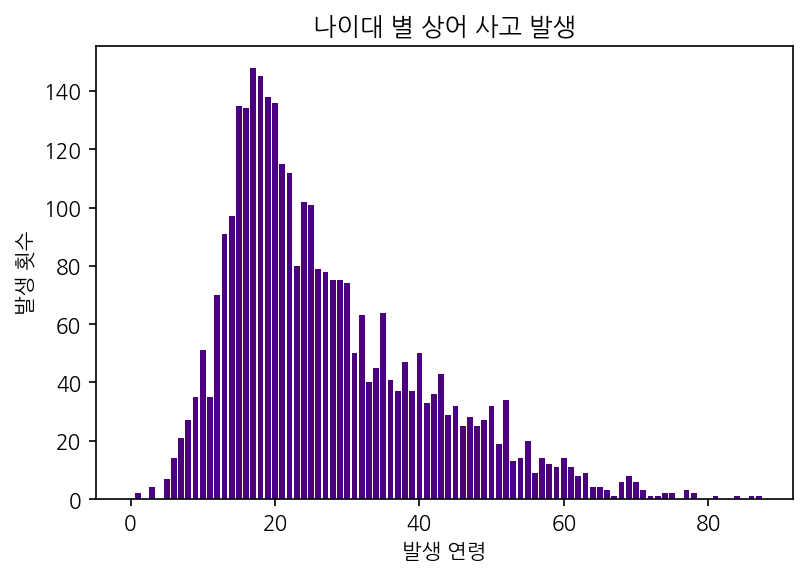

In [ ]:
agelist = [0 for i in range(88)]

for row in data2:
    if row[10] != '':
        c_age = row[10]
        agelist[c_age] += 1

import matplotlib.pyplot as plt

plt.figure(dpi = 150)
plt.rc('font', family='NanumGothic')
plt.title('나이대 별 상어 사고 발생') 
plt.bar(range(88), agelist, color='indigo')
plt.xlabel('발생 연령') # x축 이름
plt.ylabel('발생 횟수') # y축 이름

plt.show()

결과 분석 - 상어 사고는 주로 20대에 주로 발생함을 알 수 있다.

원인 : 상어들은 홀로 있는 먹이를 공격하는 습성이 있는데, 나이가 어릴 경우 보호자와 함께 있고, 나이가 많은 경우 바다에 갈 일이 적기 때문에 주로 20대가 공격을 많이받는다.

- 하위 목표 : 성별이 어떻게 작용하였는지

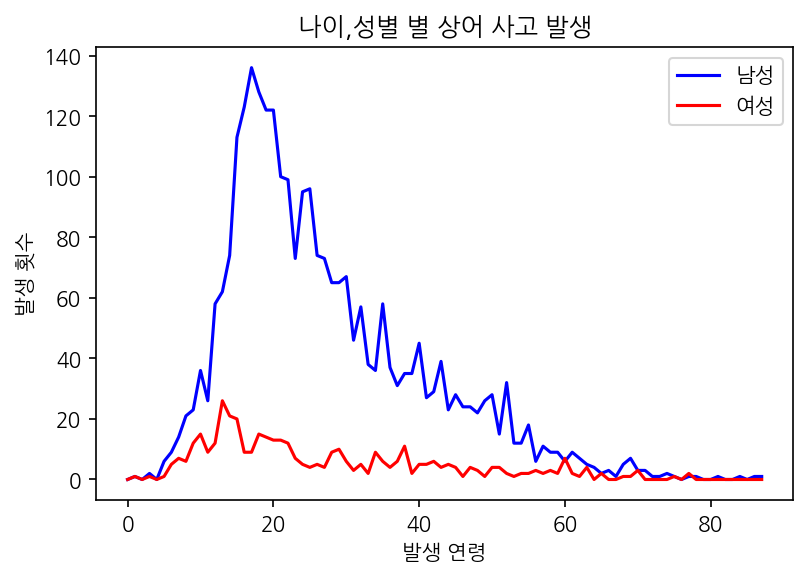

In [ ]:
#성별 나눠서 적용하기

male_agelist = [0 for i in range(88)]
female_agelist = [0 for i in range(88)]

for row in data2:
    if row[10] != '':
        if row[9] == 'M':
            c_age1 = row[10]
            male_agelist[c_age1] += 1
        if row[9] == 'F':
            c_age2 = row[10]
            female_agelist[c_age2] += 1

import matplotlib.pyplot as plt

plt.figure(dpi = 150)
plt.rc('font', family='NanumGothic')
plt.title('나이,성별 별 상어 사고 발생') 
plt.plot(range(88), male_agelist, color='b',label = '남성')
plt.plot(range(88), female_agelist, color='red',label = '여성')
plt.xlabel('발생 연령') # x축 이름
plt.ylabel('발생 횟수') # y축 이름
plt.legend()

plt.show()

결과 분석 - 여성보다 남성이 훨씬 더 많이 공격당한다는 것을 알 수 있다.

원인 : 남자가 더 바다에 많이 가고 해양 스포츠 활동을 많이 즐기기 때문이다.

- 하위 목표 : 무자극/자극에서 어떤 경우가 가장 많은 공격을 받았는지

In [ ]:
count = 0
count2 = 0
count3 = 0
for row in data : 
    if row[3] == 'Unprovoked' : 
        count += 1
    if row[3] == 'Provoked':
        count2 += 1
    else:
        count3 += 1

counts = [count, count2, count3]
print(counts)

[4385, 557, 5434]


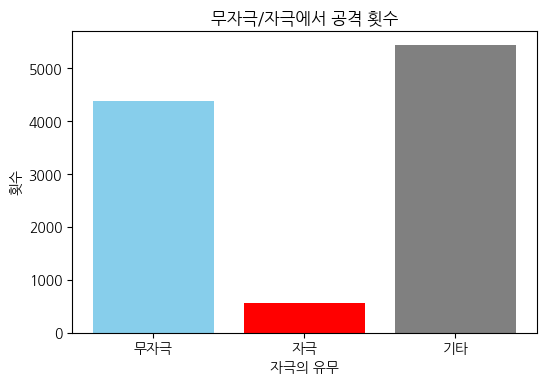

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=100)
plt.rc('font', family='NanumGothic')
plt.title('무자극/자극에서 공격 횟수')
plt.xlabel('자극의 유무')
plt.ylabel('횟수')
plt.bar(['무자극','자극','기타'], counts, color = ['skyblue','r','gray'])
plt.show()

결과 분석 : 무자극과 자극 중 자극을 하지 않았을 경우에 공격횟수가 더 많다.

원인 : 상어 사고의 대부분이 상어가 있는지 모르고 당하는 경우가 많고, 상어를 직접 도발하는 행위는 거의 일어나지 않기 때문이다.

- 하위 목표 : 자극 / 무자극에서 치명적인 피해 여부 조사

In [ ]:
#자극 무자극에 치명적 피해 계산하기

Prov_fatalY = 0
Prov_fatalN = 0
UnProv_fatalY = 0
UnProv_fatalN = 0

for row in data : 
    if row[3] == 'Provoked': 
        if row[12] == 'Y':
            Prov_fatalY += 1
        if row[12] == 'N':
            Prov_fatalN += 1
    if row[3] == 'Unprovoked':
        if row[12] == 'Y':
            UnProv_fatalY += 1
        if row[12] == 'N':
            UnProv_fatalN += 1

fatalProv = [UnProv_fatalY,UnProv_fatalN,Prov_fatalY,Prov_fatalN]
print(fatalProv)

[1124, 3183, 17, 533]


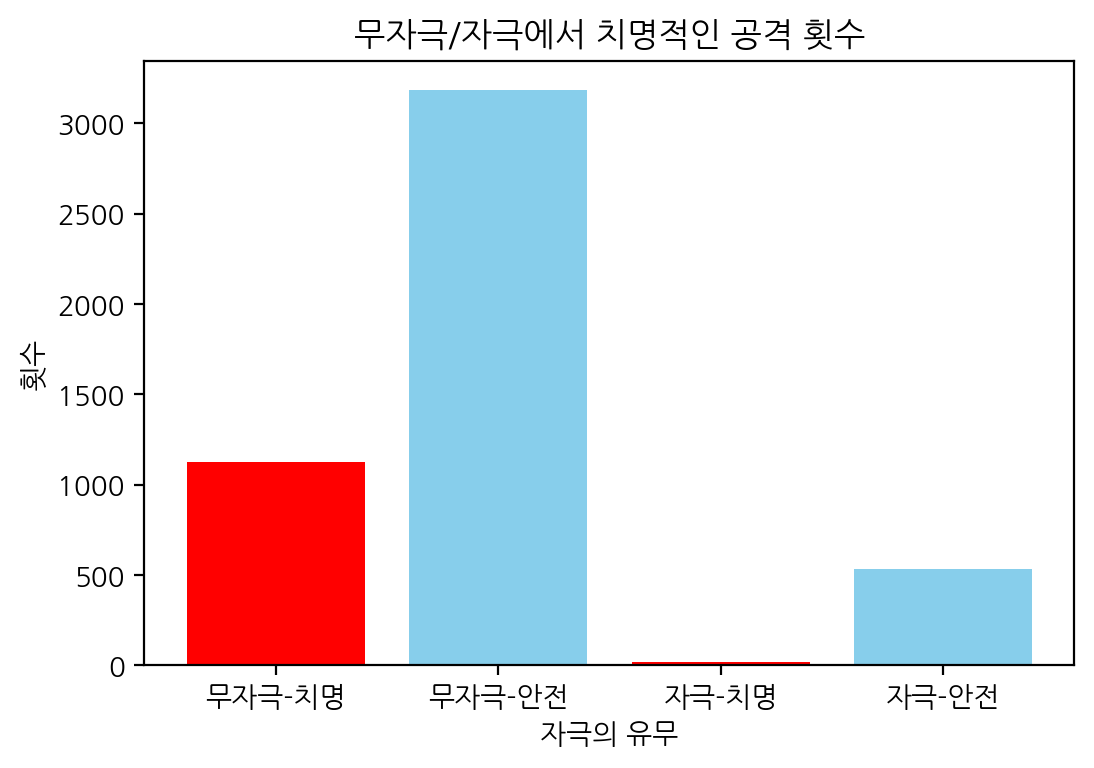

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)
plt.rc('font', family='NanumGothic')
plt.title('무자극/자극에서 치명적인 공격 횟수')
plt.xlabel('자극의 유무')
plt.ylabel('횟수')
plt.bar(['무자극-치명','무자극-안전','자극-치명','자극-안전'], fatalProv, color = ['r','skyblue','r','skyblue'])
plt.show()

결과 분석 : 상어를 도발을 했을 때 치명적인 피해 비율이 오히려 더 적었다.

원인 : 사람은 안전하다고 느끼는 상태에서 대담해지고, 다른 대상에게 가학적인 경향이 있다. 상어를 도발 한 사람들은 대부분 상어의 공격으로부터 안전한 사람들이기 때문이다.

- 하위 목표 : 어떤 행동이 가장 많은 공격을 받았는지

In [ ]:
attack1 = 0
attack2 = 0
attack3 = 0
attack4 = 0
attack5 = 0
attack6 = 0
attack7 = 0
attack0 = 0
for row in data :
    if 'Surfing' in row[7]:
        attack1 += 1
    elif 'Swimming' in row[7] :
        attack2 += 1
    elif 'Fishing' in row[7] :
        attack3 += 1
    elif 'Spearfishing' in row[7]:
        attack4 += 1
    elif 'Wading' in row[7]:
        attack5 += 1
    elif 'Bathing' in row[7] :
        attack6 += 1
    elif 'Diving' in row[7]:
        attack7 += 1
    else :
        attack0 += 1

attack = [attack0, attack1, attack2, attack3, attack4, attack5, attack6, attack7]

print(attack)

[2448, 957, 1017, 610, 399, 161, 173, 226]


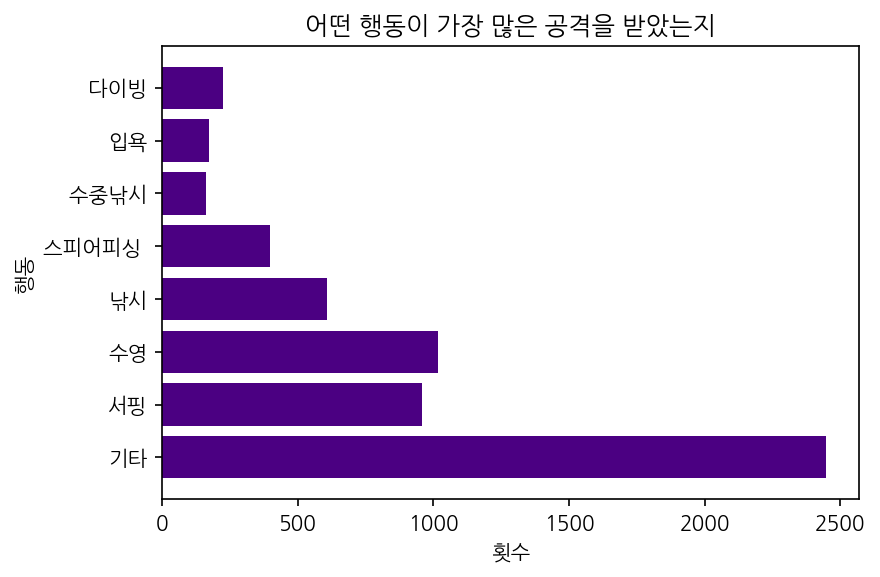

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=150)
plt.rc('font', family='NanumGothic')
plt.title('어떤 행동이 가장 많은 공격을 받았는지')
plt.xlabel('횟수')
plt.ylabel('행동')
plt.barh(['기타', '서핑','수영', '낚시', '스피어피싱 ', ' 수중낚시', '입욕', '다이빙'], attack, color = ['indigo'])
plt.show()

결과 분석 : 수영,서핑,낚시 순으로 많았다.

원인 : 수영은 상어 대부분의 호기심을 자극하고, 서핑은 상어가 서핑하는 사람을 먹이인 바다거북이나 물개로 인식하기 때문이다. 낚시의 경우엔 낚시 하다가 상어를 낚거나 낚시하던 물고기를 보고 상어가 공격하는 경우가 있었다.

**결론**

상어 공격의 대부분은 인간을 먹이로 착각하여 공격하는 경우기 때문에, 상어가 많은 곳에선 수상 활동을 자제하거나, 반짝이는 귀금속 등을 착용하여서 비늘처럼 보이지 말아야 한다. 바다로 나갈 땐 거리두기를 지키되 단체 활동을 해야하고, 상어를 향한 도발은 안전한 상황이라도 자제하도록 하자.